# Proyek Analisis Data : Bike Sharing Dataset

#### Nama : Agung Marbun
#### Email : agungmarbun2507@gmail.com
#### Id dicoding : 

# Menentukan Pertanyaan Bisnis
#### Pertanyaan 1 : Pada bulan berapakah total penggunaan terbanyak dalam rental sepeda dan kapankah bulan yang paling kecil total pemakaiannya.

#### Pertanyaan 2 : Pada saat kapankah jumlah penyewaan/rental paling banyak dan paling sedikit?

#### Pertanyaan 3 : Bagaimana kira kira dampak cuaca(weather) dan musim(season) terhadap penyewaan sepeda, pada musim apakah banyak orang yang melakukan rental/sewa sepeda.

#### Pertanyaan 4 : Berapa banyak penggunaan sepeda setiap bulannya dari pengguna yang casual(unregistered) dan yang registered.

# Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Data Wrangling

## Gathering Data

##### Pada tahap ini kita perlu menyiapkan seluruh data yang dibutuhkan (Load  Data) 

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

##### Pada tahap ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut. 

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Disini kita dapat melihat bahwa untuk tipe data pada kolom "dteday" kurang tepat, kita dapat menggantikannya nanti pada sesi cleaning data. Dan apabila kita lihat tidak ada juga terjadi "Missing Data" sehingga kita dapat melanjutkan proses ini.

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Tidak ada duplikasi data dan keanehan pada hal ini 

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Didalam tabel dimuat informasi informasi mengenai tabel dari day.csv dan seluruh datanya lengkap kita bisa lihat pada row "count"  masing masing kolom.

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Sama halnya disini kita dapat melihat juga bahwa untuk tipe data pada kolom "dteday" kurang tepat, kita dapat menggantikannya nanti pada sesi cleaning data. Dan apabila kita lihat tidak ada juga terjadi "Missing Data" sehingga kita dapat melanjutkan proses ini.

In [8]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Tidak ada duplikasi data dan keanehan pada hal ini 

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Didalam tabel dimuat informasi informasi mengenai tabel dari hour.csv dan seluruh datanya lengkap kita bisa lihat pada row "count"  masing masing kolom.

## Cleaning Data 

#### Pada tahap ini ada kita akan sedikit memperbaiki hal hal yang seharusnya dapat membuat data kita itu bisa dilihat jauh lebih baik seperti : Penggantian "TypeData" dari kolom "dteday" , agar menjadi type "datetime".  

In [10]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

#### Selanjutnya saya ingin mengganti beberapa nama yang cukup membingungkan berdasarkan apa yang telah saya baca di "readme.txt". Berikut list-nya :

- 1. dteday = date
- 2. yr     = year
- 3. mnth   = month
- 4. hr     = hour
- 5. weathersit = weather
- 6. hum    = humidity
- 7. cnt    = count

#### Sebenarnya saya juga ingin mengganti temp menjadi temprature tetapi nantinya kolom akan terlalu panjang, sehingga tidak saya lakukan.

In [11]:
day_df = day_df.rename(columns={"weathersit":"weather",
                       "dteday":"date",
                       "yr":"year",
                       "mnth":"month",
                       "hum":"humidity",
                       "cnt":"count"})

In [12]:
hour_df = hour_df.rename(columns={"weathersit":"weather",
                       "dteday":"date",
                       "yr":"year",
                       "hr":"hour",
                       "mnth":"month",
                       "hum":"humidity",
                       "cnt":"count"})

#### Langkah selanjutnya saya memastikan bahwa seluruh perubahan/perombakan telah terjadi pada masing masing nama kolom, dan juga "typedata" untuk date ("dteday") 

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [15]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Seperti yang kita lihat bahwa seluruh data seperti apa yang sudah kita harapkan nama kolom sudah berubah begitu juga dengan typedata pada "date"

# Exploratory Data Analysis (EDA)

### Pertanyaan No 1

In [17]:
hour_df.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Dari data diatas dapat kita lihat bahwa rental/ sewa sepeda tersebut berjalan 24 jam, dari jam 00.00 sampai jam 23.00, dan berlangsung selama 2 tahun (24 bulan). Sekarang saya ingin mengetahui ada berapa banyak total penggunaan sepeda setiap bulannya.

In [18]:
sewa_bulanan = day_df.groupby(["year", "month"])["count"].sum()
print(sewa_bulanan)

year  month
0     1         38189
      2         48215
      3         64045
      4         94870
      5        135821
      6        143512
      7        141341
      8        136691
      9        127418
      10       123511
      11       102167
      12        87323
1     1         96744
      2        103137
      3        164875
      4        174224
      5        195865
      6        202830
      7        203607
      8        214503
      9        218573
      10       198841
      11       152664
      12       123713
Name: count, dtype: int64


#### Dari data diatas kita telah dapat melihat jumlah total pemakaian rental/sewa sepeda setiap bulannya berlangsung selama 2 tahun (24 bulan).

### Pertanyaan No 2 

#### Disini saya ingin mengetahui kapankah tanggal dimana pemakaian rental/sewa itu sangat banyak dan kapan juga pada saat pemakaian/rental itu sangat sedikit.

In [19]:
day_df.sort_values(by="count", ascending=False)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


#### Dari data diatas kita dapat melihat pada tanggal 29 -10-2012 adalah jumlah paling sedikit penyewaan sepeda, dan paling tertinggi adalah pada tanggal 15-09-2012.

In [20]:
hari_tertinggi = day_df.groupby("date")["count"].sum()
hari_tertinggi = hari_tertinggi.idxmax()
print("tanggal dengan jumlah penyewaan sepeda tertinggi adalah", hari_tertinggi)

tanggal dengan jumlah penyewaan sepeda tertinggi adalah 2012-09-15 00:00:00


In [21]:
hari_terendah = day_df.groupby("date")["count"].sum()
hari_terendah = hari_terendah.idxmin()
print("tanggal dengan jumlah penyewaan sepeda terendah adalah", hari_terendah)

tanggal dengan jumlah penyewaan sepeda terendah adalah 2012-10-29 00:00:00


#### Dari kedua rumus diatas saya hanya ingin memastikan apakah data yang ditabel sesuai dengan pada kode yang saya berikan. 

### Pertanyaan No 3 

#### Disini saya ingin melihat berapa banyakkah pemakaian dari masing masing cuaca dan musim dari total 17379 jam yang beroperasi.  Sehingga saya memasukkan kode sebagai berikut.

In [22]:
hour_df.groupby(by="weather").instant.count()

weather
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

In [23]:
hour_df.groupby(by="season").instant.count()

season
1    4242
2    4409
3    4496
4    4232
Name: instant, dtype: int64

#### Sekarang kita telah dapat melihat pembagiannya baik berdasarkan "weather/cuaca" maupun "season/musim". 

### Pertanyaan No 4

#### Disini saya ingin melihat/ melakukan perbandingan antara pengguna "casual" dan "registered" sehingga saya butuh mengetahui sebanyak apakah jumlahnya pada masing masing bulan selam 2 tahun (24 Bulan).

In [24]:
day_df.groupby(["year", "month"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

casual  registered   count
year month                            
0    1        3073       35116   38189
     2        6242       41973   48215
     3       12826       51219   64045
     4       22346       72524   94870
     5       31050      104771  135821
     6       30612      112900  143512
     7       36452      104889  141341
     8       28842      107849  136691
     9       26545      100873  127418
     10      25222       98289  123511
     11      15594       86573  102167
     12       8448       78875   87323
1    1        8969       87775   96744
     2        8721       94416  103137
     3       31618      133257  164875
     4       38456      135768  174224
     5       44235      151630  195865
     6       43294      159536  202830
     7       41705      161902  203607
     8       43197      171306  214503
     9       43778      174795  218573
     10      34538      164303  198841
     11      21009      131655  152664
     12      13245      110468  123713

#### Dari data diatas kita mendapatkan informasi terkait jumlah user casual dan registered per bulannya. 

## Visualization & Explanatory Analysis 

#### Sebelum lanjut lebih jauh disini saya ingin menambahkan beberapa informasi mengenai "angka" pada beberapa data yang ada disini  berdasarkan "readme.txt" yang sudah saya baca dan terjemahkan.

- 1. yr : year (0: 2011, 1:2012)

### Cuaca (weather)
- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
- 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
- 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

### Musim (season)
- 1: Musim Semi 
- 2: Musim Panas 
- 3: Musim Gugur 
- 4: musim Dingin

## Pertanyaan No 1 :  Pada bulan berapakah total penggunaan terbanyak dalam rental sepeda dan kapankah bulan yang paling kecil total pemakaiannya.

In [25]:
sewa_bulanan = day_df.groupby(["year", "month"])["count"].sum()
print(sewa_bulanan)

year  month
0     1         38189
      2         48215
      3         64045
      4         94870
      5        135821
      6        143512
      7        141341
      8        136691
      9        127418
      10       123511
      11       102167
      12        87323
1     1         96744
      2        103137
      3        164875
      4        174224
      5        195865
      6        202830
      7        203607
      8        214503
      9        218573
      10       198841
      11       152664
      12       123713
Name: count, dtype: int64


##### Mungkin pada data diatas kita sudah dapat melihat dan membandingkan pada bulan berapakah terjadi penyewaan/rental dengan jumlah paling banyak dan paling sedikit, tetapi ada baiknya kita plot seluruh data tersebut dalam bentuk grafik agar memudahkan orang melihat informasinya. 

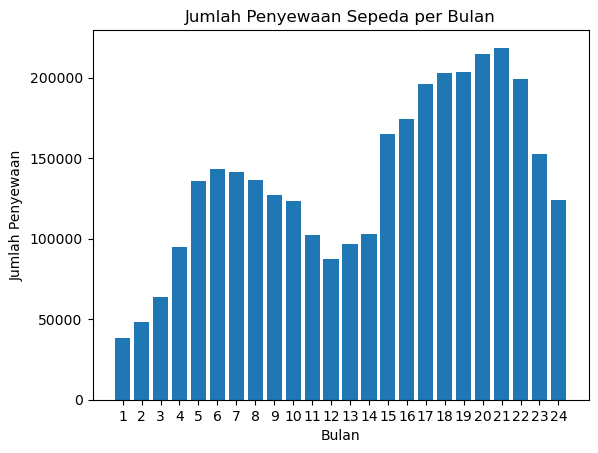

In [26]:
sewa_bulanan = pd.DataFrame({"month": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
"count": [38189, 48215, 64045, 94870, 135821, 143512, 141341, 136691, 127418, 123511, 102167, 87323,
96744, 103137, 164875, 174224, 195865, 202830, 203607, 214503, 218573, 198841, 152664, 123713]})

plt.bar(sewa_bulanan["month"], sewa_bulanan["count"])
plt.title("Jumlah Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.show()

# Conclusion Dari Pertanyaan No 1
#### Dari visualisasi data diatas kita dapat lebih mudah melihat bahwa batang yang paling tinggi itu berada pada bulan ke-21(Bulan September Pada tahun 2012 yaitu sebanyak 218573 ), dan yang paling rendah itu berada pada bulan ke-1(Bulan Januari pada tahun 2011 yaitu sebanyak 38189) kemungkinan karena rental sepeda ini baru beroperasi pada bulan Januari dan belum familiar dikalangan masyarakat. Apabila kita lihat dari grafik jumlahnya terus meningkat setiap bulannya,itu mungkin karena semakin banyak persebaran informasi mengenai rental sepeda berikut.

#### Kita juga dapat melihat pada tahun pertama jumlah penyewaan sepeda itu tidak sebanyak pada tahun kedua. Selanjutnya kita juga dapat melihat bahwa pada bulan awal dan menjelang akhir tahun penyewaan mengalami penurunan dibandingkan dengan bulan bulan lainnya, mungkin hal ini terjadi karena pada bulan bulan tersebutlah banyak hari libur bagi kebanyakan orang.

## Pertanyaan No 2 : Pada saat kapankah jumlah penyewaan/rental paling banyak dan paling sedikit ?

In [27]:
day_df.sort_values(by="count", ascending=False)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


# Conclusion Dari Pertanyaan No 2
#### Berdasarkan kolom berikut kita telah mengetahui pada tanggal berapakah jumlah penyewaan sepeda terendah dan tertinggi selama 2 tahun. Nah, untuk tanggal penyewaan/rental sepeda yang terendah jatuh pada tanggal 29 Oktober 2012 (2012-10-29), ada beberapa hal yang saya dapat analisa berdasarkan kolom diatas : 

 - 1. Season (Musim) = Berdasarkan yang saya baca melalui readme.txt pada data ini "Angka 4 Pada Season itu menunjukkan bahwa sedang terjadi "Musim dingin (Winter)".
 - 2. Weather (Cuaca) = Juga sama halnya untuk weather, berdasarkan yang saya baca juga pada readme.txt untuk data ini "Angka 3 Pada Weather menunjukkan bahwa sedang terjadi : Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)".

#### Sehingga tidak heran apabila pada tanggal 29 Oktober 2012 hanya berjumlah 22 sepeda saja yang dirental pada hari tersebut, disebabkan oleh karena cuaca yang sangat buruk ditambah lagi dengan musim yang tak mendukung yaitu pada musim dingin.

#### Begitu juga sebaliknya untuk tanggal penyewaan/rental sepeda yang tertinggi itu jatuh pada tanggal 15 September 2012 (2012-09-15), disini kita juga dapat membedah alasannya lebih jauh, mengapa pada hari ini banyak terjadi rental/sewa sepeda, berdasarkan analisis kolom diatas :

- 1. Season (Musim) = Berdasarkan yang saya baca melalui readme.txt pada data ini "Angka 3 Pada Season itu menunjukkan bahwa sedang terjadi "Musim gugur (Fall)".

- 2. Weather (Cuaca) = Berdasarkan readme.txt "Angka 1 Pada Weather itu menunjukkan bahwa sedang terjadi : Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)"

#### Berdasarkan musim dan cuaca kita dapat melihat bahwa sedang terjadi musim gugur, (salju ringan atau kemungkinan hujan ringan + badai petir + awan tersebar, atau hanya hujan ringan + awan tersebar). Sehingga hal ini tidak terlalu buruk dibandingkan pada kejadian sebelumnya, sehingga alasan mengapa pada tanggal 15 September 2012 itu sangat banyak orang yang merental/sewa sepeda itu dapat kita mengerti/pahami.

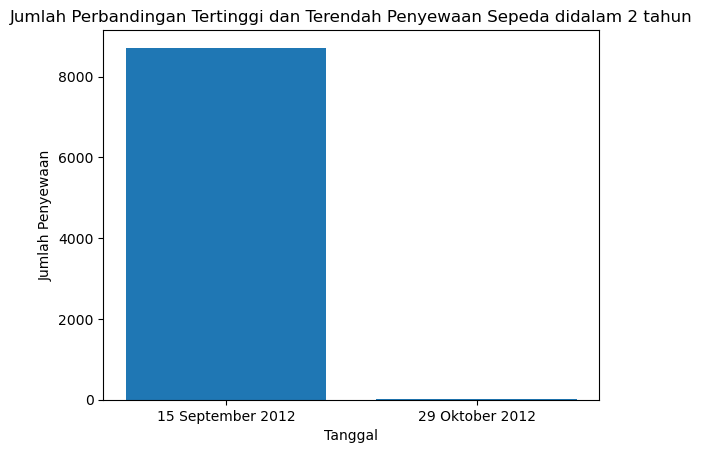

In [28]:
sewa_bulanan = pd.DataFrame({"month": ["15 September 2012","29 Oktober 2012"], "count": [8714,22]})

plt.bar(sewa_bulanan["month"], sewa_bulanan["count"])
plt.title("Jumlah Perbandingan Tertinggi dan Terendah Penyewaan Sepeda didalam 2 tahun")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")

plt.xticks(ticks=[0,1], labels=["15 September 2012","29 Oktober 2012"])

plt.show()

## Pertanyaan No 3 : Bagaimana kira kira dampak cuaca terhadap penyewaan sepeda, pada musim apakah banyak orang yang melakukan rental/sewa sepeda.

### Berdasarkan readme.txt disana kita mendapatkan beberapa informasi penting mengenai "angka" pada masing masing cuaca (weather) dan musim (season). Penjelasannya seperti berikut :
### Cuaca (weather)
- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
- 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
- 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

### Musim (season)
- 1: Musim Semi 
- 2: Musim Panas 
- 3: Musim Gugur 
- 4: musim Dingin

In [29]:
hour_df.groupby(by="weather").instant.count()

weather
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

In [30]:
hour_df.groupby(by="season").instant.count()

season
1    4242
2    4409
3    4496
4    4232
Name: instant, dtype: int64

#### Kita dapat menggabungkan data diatas agar terlihat lebih rapi menggunakan command "concat" , sehingga didapatkan hasilnya sebagai berikut. 

In [31]:
weather = hour_df.groupby(by="weather").instant.count()
season = hour_df.groupby(by="season").instant.count()

merged_data = pd.concat([weather, season], axis=1)
merged_data.columns = ["weather_count", "season_count"]

print(merged_data)

   weather_count  season_count
1          11413          4242
2           4544          4409
3           1419          4496
4              3          4232


#### Untuk mempermudah pemahaman mengenai data berikut kita perlu mem-visualisasikan datanya dalam bentuk yang lebih sederhana. Disini saya plot menggunakan lineplot, tidak menggunakan barplot  karena menurut saya agar lebih jelas terlihat perbandingannya.

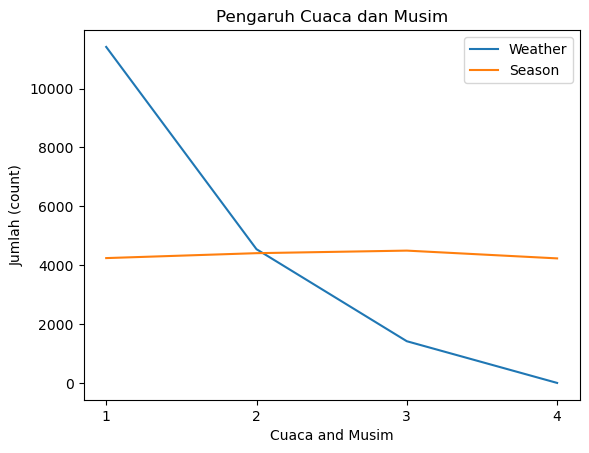

In [32]:
weather_count = [11413, 4544, 1419, 3]
season_count = [4242, 4409, 4496, 4232]

plt.plot(weather_count, label="Weather")
plt.plot(season_count, label="Season")

plt.title("Pengaruh Cuaca dan Musim")
plt.xlabel("Cuaca and Musim")
plt.ylabel("Jumlah (count)")
plt.xticks(ticks=[0, 1, 2, 3], labels=[1, 2, 3, 4])

plt.legend()
plt.show()


# Conclusion Dari Pertanyaan No 3
### Berdasarkan gambar diatas ada banyak hal yang dapat kita simpulkan mengenai dampak penggunaan sepeda terhadap dampak cuaca dan musim, berikut beberapa hal yang bisa saya analisis.

#### 1. Cuaca (Weather) Berdasarkan data diatas kita dapat melihat grafik yang cukup signifikan antara pengaruh penggunaan sepeda terhadap cuaca yang terjadi. Pada cuaca 1 (cuaca cerah, sedikit awan, berawan sebagian, berawan sebagian) ada banyak sekali orang melakukan rental. Berbeda dengan pada cuaca ke 2 dan ke 3 kita dapat melihat penurunan yang cukup signifikan dibandingkan cuaca 1. Lebih parah lagi pada cuaca ke 4, berdasarkan data hanya ada 3 orang saja yang melakukan rental pada cuaca tersebut.  
#### 2. Musim (Season) Berdasarkan data diatas saya melihat bahwa pengaruh musim itu sangat tidak terlalu berdampak untuk penyewaan/rental sepeda, semua musim dari musim jenis 1-4 terlihat bahwa penggunaan sepeda pada musim itu cukup terbagi rata, dalam artian bahwa tidak terlihat perubahan yang cukup signifikan disetiap musim, berdasarkan data pada musim ke-3 adalah jumlah penyewaan/rental terbanyak selama 2 tahun.

### Sehingga dari sini kita dapat menarik kesimpulan bahwa pengaruh cuaca > pengaruh musim dalam kasus ini.

## Pertanyaan No 4 :  Berapa banyak penggunaan sepeda setiap bulannya dari pengguna yang casual (unregistered) dan yang registered.

In [33]:
day_df.groupby(["year", "month"]).agg({
    "casual": "sum",
    "registered": "sum",
})

casual  registered
year month                    
0    1        3073       35116
     2        6242       41973
     3       12826       51219
     4       22346       72524
     5       31050      104771
     6       30612      112900
     7       36452      104889
     8       28842      107849
     9       26545      100873
     10      25222       98289
     11      15594       86573
     12       8448       78875
1    1        8969       87775
     2        8721       94416
     3       31618      133257
     4       38456      135768
     5       44235      151630
     6       43294      159536
     7       41705      161902
     8       43197      171306
     9       43778      174795
     10      34538      164303
     11      21009      131655
     12      13245      110468

### Berdasarkan data diatas kita sudah dapat melihat bahwa perbandingan antara user (pengguna) casual itu jauh lebih sedikit dibandingkan yang melakukan registered, agar kita dapat melihat perbandingannya dengan baik, kita dapat membuat visualisasi dari data tersebut

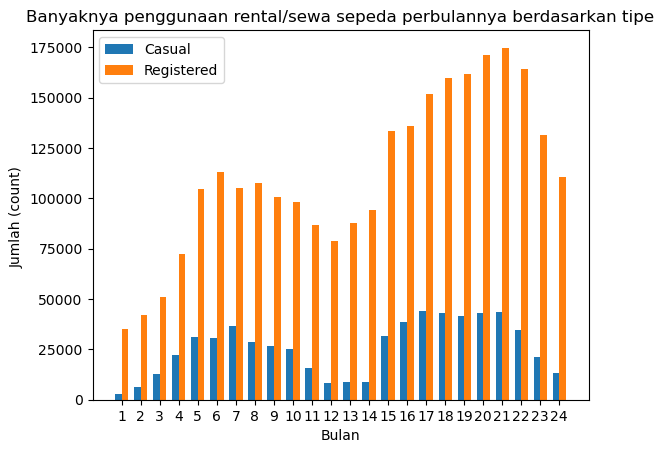

In [34]:
casual = [3073, 6242, 12826, 22346, 31050, 30612, 36452, 28842, 26545, 25222, 15594, 8448, 8969, 8721, 31618, 38456, 44235, 43294, 41705, 43197, 43778, 34538, 21009, 13245]
registered = [35116, 41973, 51219, 72524, 104771, 112900, 104889, 107849, 100873, 98289, 86573, 78875, 87775, 94416, 133257, 135768, 151630, 159536, 161902, 171306, 174795, 164303, 131655, 110468]
months = np.arange(1, 25)


width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(months - width/2, casual, width, label="Casual")
rects2 = ax.bar(months + width/2, registered, width, label="Registered")


ax.set_xticks(months)
ax.set_xticklabels(months)
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah (count) ")
ax.set_title("Banyaknya penggunaan rental/sewa sepeda perbulannya berdasarkan tipe")
ax.legend()


plt.show()

# Conclusion Dari Pertanyaan No 4
### Disini kita dapat menyimpulkan bahwa dominasi dari "Registered User" itu jauh lebih banyak daripada "Casual User". Bahkan tidak pernah dalam satu bulanpun (bulan tertentu) "Casual User" mendominasi penggunaan rental sepeda tersebut. Apabila dihubungkan dengan data yang lain seperti cuaca dan musim, tidak ada korelasi antara data berikut ini. 

# RFM ANALYSIS

- Recency: parameter yang digunakan untuk melihat kapan terakhir seseorang melakukan rental.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seseorang melakukan rental.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa banyak orang yang melakukan rental pada jam tersebut.

#### Disini saya melakukan analisis RFM kurang lebih mengikuti cara pada contoh di kelas dicoding 

In [35]:
frequency_df = hour_df.groupby("instant").size().reset_index(name="frequency")
hour_df = pd.merge(hour_df, frequency_df, on="instant")
hour_df = hour_df.rename(columns={"weathersit":"weather",
                       "dteday":"date",
                       "yr":"year",
                       "hr":"hour",
                       "mnth":"month",
                       "hum":"humidity",
                       "cnt":"count"})
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,frequency
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [36]:
rfm_df = hour_df.groupby(by="instant", as_index=False).agg({
    "date": "max",
    "casual": "nunique",
    "count": "sum"
})
rfm_df.columns = ["instant", "date", "frequency", "monetary"]
rfm_df.head()

,instant,date,frequency,monetary
0,1,2011-01-01,1,16
1,2,2011-01-01,1,40
2,3,2011-01-01,1,32
3,4,2011-01-01,1,13
4,5,2011-01-01,1,1


In [37]:
rfm_df["date"] = pd.to_datetime(rfm_df["date"])
recent_date = pd.to_datetime(hour_df["date"]).max().date()
rfm_df["recency"] = (recent_date - rfm_df["date"].dt.date).dt.days
rfm_df.head()

,instant,date,frequency,monetary,recency
0,1,2011-01-01,1,16,730
1,2,2011-01-01,1,40,730
2,3,2011-01-01,1,32,730
3,4,2011-01-01,1,13,730
4,5,2011-01-01,1,1,730


### Disini saya ingin drop/ ingin menghilangkan data "date" agar mempermudah analisis

In [38]:
rfm_df.drop("date", axis=1, inplace=True)
rfm_df.head()

,instant,frequency,monetary,recency
0,1,1,16,730
1,2,1,40,730
2,3,1,32,730
3,4,1,13,730
4,5,1,1,730


#### Nah disini kita dapat melihat bahwa recency 5 data paling atas adalah "730" karena mereka adalah orang utama/teratas yang melakukan rental sepeda (pada hari pertama) (1/731)
#### 1/731 adalah perbandingan antara hari dan jumlah total hari operasi rental sepeda tersebut.

In [39]:
rfm_df.describe()

,instant,frequency,monetary,recency
count,17379.0000,17379.0,17379.000000,17379.000000
mean,8690.0000,1.0,189.463088,363.827378
std,5017.0295,0.0,181.387599,210.072051
min,1.0000,1.0,1.000000,0.000000
25%,4345.5000,1.0,40.000000,182.000000
50%,8690.0000,1.0,142.000000,364.000000
75%,13034.5000,1.0,281.000000,546.000000
max,17379.0000,1.0,977.000000,730.000000


#### Pada tahap dibawah saya ingin mengurutkan orang terakhir kelima setelah operasi rental sepeda ini berakhir.

In [40]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,instant,frequency,monetary,recency
17378,17379,1,49,0
17355,17356,1,34,0
17356,17357,1,19,0
17357,17358,1,11,0
17358,17359,1,1,0


#### Sehingga dapat kita lihat pada kolom recency itu adalah "0" karena merekalah orang terakhir yang melakukan rental. Dan apabila kita amati kelimanya adalah nomor terakhir dari jumlah data pada "hour.csv"

In [41]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,instant,frequency,monetary,recency
0,1,1,16,730
11591,11592,1,2,242
11577,11578,1,240,243
11578,11579,1,256,243
11579,11580,1,367,243


#### Melalui data dari tabel ini kita dapat melihat bahwa seluruh frequency itu akan berjumlah "1", kenapa? karena pada kasus ini tiap orang masing masing tidak mempunyai "id card" sehingga ketika melakukan rental, orang tersebut akan mempunyai nomor urut/kode yang baru sehingga pada data berikut kita tidak dapat mengidentifikasi seberapa sering "seseorang" melakukan rental.



#### Langkah terakhir disini saya membuat grafik untuk analasis RFM ini, berdasarkan kode(contoh) pada pertemuan pada kelas "Dicoding" 

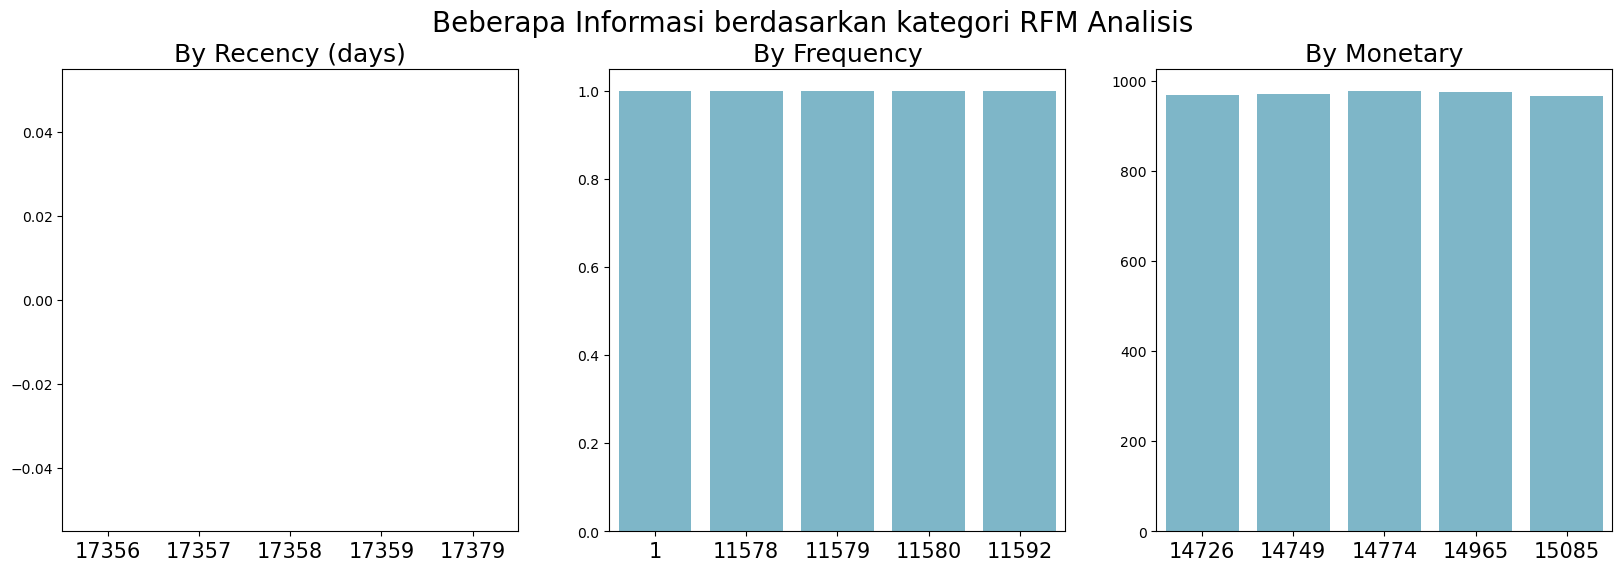

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sn.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sn.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sn.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Beberapa Informasi berdasarkan kategori RFM Analisis", fontsize=20)
plt.show()

In [43]:
day_df.to_csv("all_datadayagung.csv", index=False)

In [44]:
hour_df.to_csv("all_datahouragung.csv", index=False)